### Importing Required Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import numpy as np

### Importing the data

In [2]:
train_path = "D:/Code/Projects/Bank Default Hackathon/Training Data.csv"
test_path = "D:/Code/Projects/Bank Default Hackathon/Test Data.csv"
df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)
df_train.rename(columns={'Id':'id'},inplace=True)

### Missing values

In [3]:
def print_missing(dataset, print_percent=True):
    missing = dataset.isnull().mean()
    missing = missing[missing>0]
    
    if len(missing)>0:
        missing.sort_values(inplace=True,ascending=False)
        missing.plot.bar()
        plt.ylabel("Fraction missing values")
        plt.title("Missing values")
        if print_percent:
            missing_features = missing.index.tolist()
            print("Percent missing values: ")
            for feature in missing_features:
                print(feature,'  \t:' ,np.round(dataset[feature].isnull().mean(),4), '%')
    else:
        print("No missing values!")

In [4]:
print_missing(df_train)

No missing values!


In [5]:
print_missing(df_test)

No missing values!


### Check for Duplicates

In [7]:
dups_train = df_train.duplicated()
dups_test = df_test.duplicated()
# report if there are any duplicates
print(dups_train.any())
print(dups_test.any())

# list all duplicate rows
print(df_train[dups_train])
print(df_test[dups_test])

False
False
Empty DataFrame
Columns: [id, income, age, experience, married, house_ownership, car_ownership, profession, city, state, current_job_years, current_house_years, risk_flag]
Index: []
Empty DataFrame
Columns: [id, income, age, experience, married, house_ownership, car_ownership, profession, city, state, current_job_years, current_house_years]
Index: []


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   id                   252000 non-null  int64 
 1   income               252000 non-null  int64 
 2   age                  252000 non-null  int64 
 3   experience           252000 non-null  int64 
 4   married              252000 non-null  object
 5   house_ownership      252000 non-null  object
 6   car_ownership        252000 non-null  object
 7   profession           252000 non-null  object
 8   city                 252000 non-null  object
 9   state                252000 non-null  object
 10  current_job_years    252000 non-null  int64 
 11  current_house_years  252000 non-null  int64 
 12  risk_flag            252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   28000 non-null  int64 
 1   income               28000 non-null  int64 
 2   age                  28000 non-null  int64 
 3   experience           28000 non-null  int64 
 4   married              28000 non-null  object
 5   house_ownership      28000 non-null  object
 6   car_ownership        28000 non-null  object
 7   profession           28000 non-null  object
 8   city                 28000 non-null  object
 9   state                28000 non-null  object
 10  current_job_years    28000 non-null  int64 
 11  current_house_years  28000 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 2.6+ MB


### Numerical, Year and Categorical features

In [8]:
def get_fnames_by_type(dataset):
    # list of numerical variables
    numerical_features = [feature for feature in dataset.columns if dataset[feature].dtypes != 'O']
    print('Number of numerical variables: ', len(numerical_features))

    year_features = [feature for feature in numerical_features if 'yr'\
                     in feature.lower() or 'year' in feature.lower()]
    print(f"Year features: {year_features}")
    
    categorical_features = [feature for feature in dataset.columns if \
                           feature not in numerical_features]
    print('Number of categorical variables: ', len(categorical_features))
    
    return numerical_features, year_features, categorical_features

In [9]:
numerical_features, year_features, categorical_features = \
get_fnames_by_type(df_train)

Number of numerical variables:  7
Year features: ['current_job_years', 'current_house_years']
Number of categorical variables:  6


## Categorical Features

In [10]:
print(categorical_features)

['married', 'house_ownership', 'car_ownership', 'profession', 'city', 'state']


## Get number of categories

In [11]:
def get_number_categories(dataset, categorical_features):
    print("Number of categories per categorical feature: ")
    for feature in categorical_features:
        print(f"{feature:20}: {len(dataset[feature].unique())}")

In [12]:
get_number_categories(df_train, categorical_features)

Number of categories per categorical feature: 
married             : 2
house_ownership     : 3
car_ownership       : 2
profession          : 51
city                : 317
state               : 29


In [13]:
get_number_categories(df_test, categorical_features)

Number of categories per categorical feature: 
married             : 2
house_ownership     : 3
car_ownership       : 2
profession          : 51
city                : 317
state               : 29


### Value count percentage

In [14]:
def value_count(dataset, categorical_features, target_feature):
    for feature in categorical_features:
        # Proceed if the unique classes are less than 20
        if len(dataset[feature].unique())<20:
            data=dataset.copy()
            print(f"Value count percentage for: {feature}")
            print(data[feature].value_counts()/len(data))
            print()

### Find out the relationship between categorical variable and dependent feature risk_flag

In [15]:
value_count(df_train, categorical_features, 'risk_flag')

Value count percentage for: married
single     0.897905
married    0.102095
Name: married, dtype: float64

Value count percentage for: house_ownership
rented          0.920230
owned           0.051262
norent_noown    0.028508
Name: house_ownership, dtype: float64

Value count percentage for: car_ownership
no     0.698413
yes    0.301587
Name: car_ownership, dtype: float64



In [16]:
value_count(df_test, categorical_features, 'risk_flag')

Value count percentage for: married
single     0.898929
married    0.101071
Name: married, dtype: float64

Value count percentage for: house_ownership
rented          0.921607
owned           0.051071
norent_noown    0.027321
Name: house_ownership, dtype: float64

Value count percentage for: car_ownership
no     0.700893
yes    0.299107
Name: car_ownership, dtype: float64



In [26]:
discrete_features = ['experience', 'risk_flag','current_job_years', 'current_house_years']

continuous_features = ['id', 'income', 'age', ]

In [27]:
def discrete_class_counts(dataset, discrete_features):
    df = dataset.copy()
    all_features = dataset.columns.to_list()
    for feature in discrete_features:
        class_counts = df.groupby(feature)[feature].count()
        class_counts.plot.bar()
        plt.show()

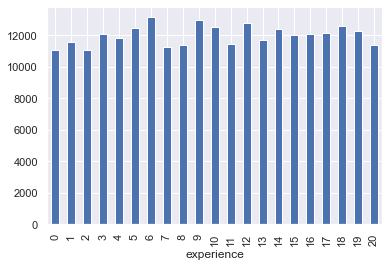

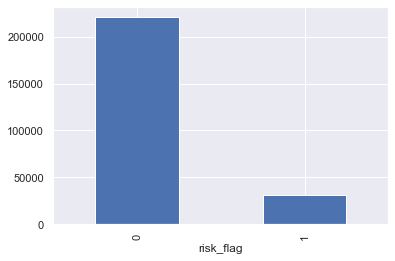

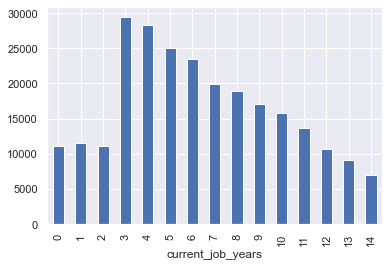

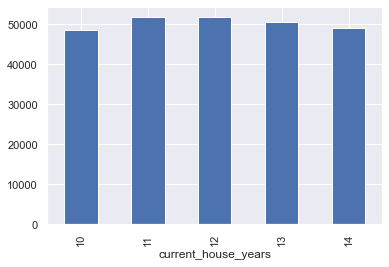

In [28]:
discrete_class_counts(df_train, discrete_features)

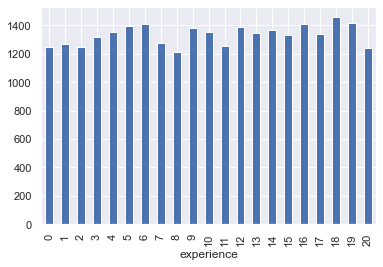

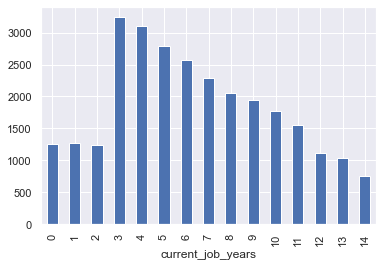

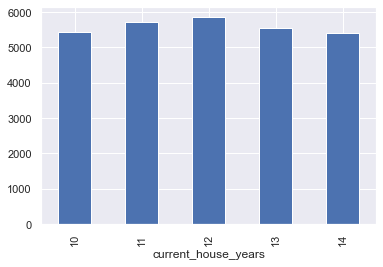

In [34]:
df_copy = discrete_features.copy()
df_copy.remove('risk_flag')
discrete_class_counts(df_test, df_copy)

In [35]:
discrete_features.copy()

['experience', 'risk_flag', 'current_job_years', 'current_house_years']

In [36]:
def hist_continuous(dataset, continuous_features):
    for feature in continuous_features:
        data=dataset.copy()
        data[feature].hist(bins='auto')
        plt.xlabel(feature)
        plt.ylabel("Count")
        plt.title(feature)
        print("Skewness of ",feature," = ",dataset[continuous_features].skew()[feature])
        plt.show()

Skewness of  id  =  0.0


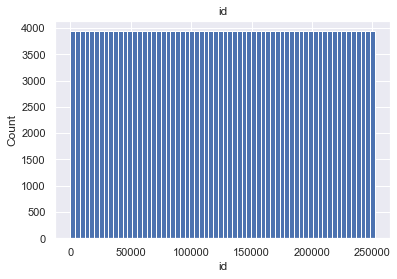

Skewness of  income  =  0.005957563397012054


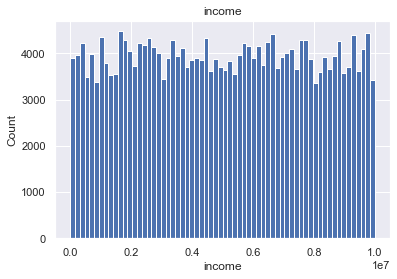

Skewness of  age  =  -0.005314976215515299


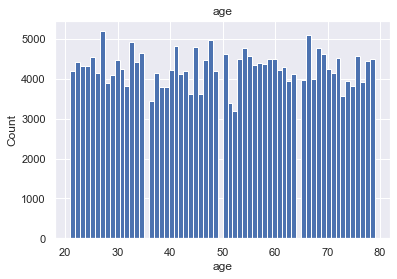

In [37]:
hist_continuous(df_train, continuous_features)

Skewness of  id  =  0.0


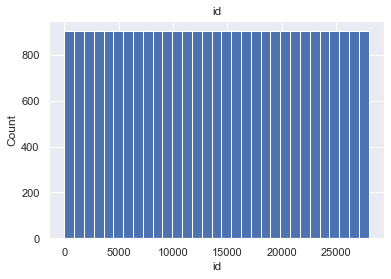

Skewness of  income  =  -0.007805081586048975


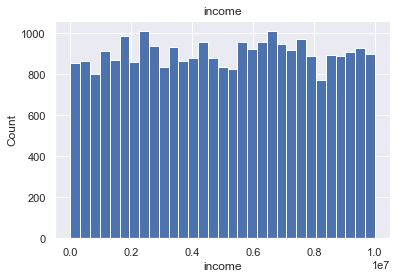

Skewness of  age  =  -0.009766141239145282


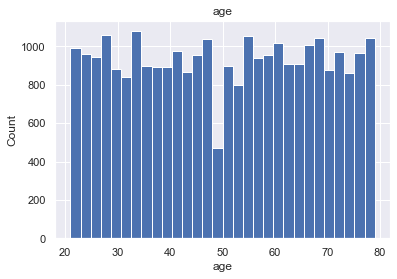

In [38]:
hist_continuous(df_test, continuous_features)